In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

house_price = pd.read_csv('/content/house-prices-advanced-regression-techniques.csv.zip')

house_price["date"] = pd.to_datetime(house_price["date"])




In [5]:
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


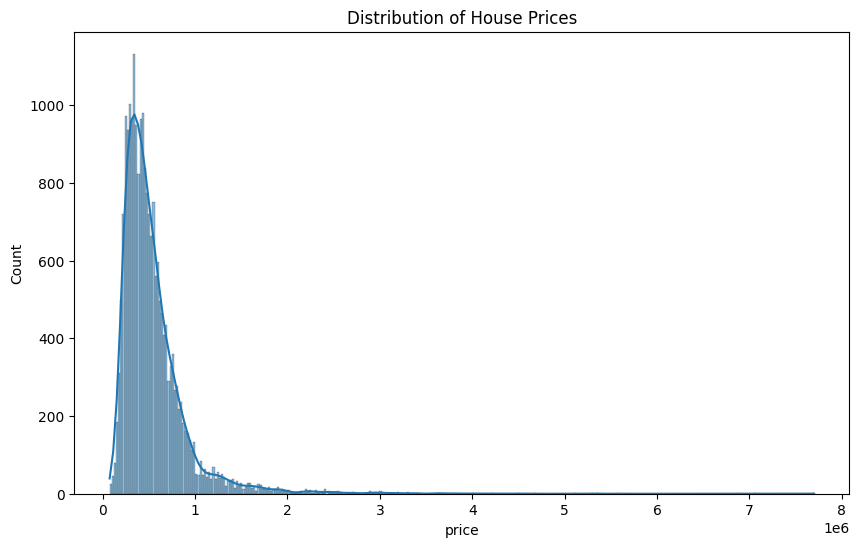

In [6]:
plt.figure(figsize = (10, 6))
sns.histplot(house_price["price"], kde = True)
plt.title("Distribution of House Prices")
plt.show()

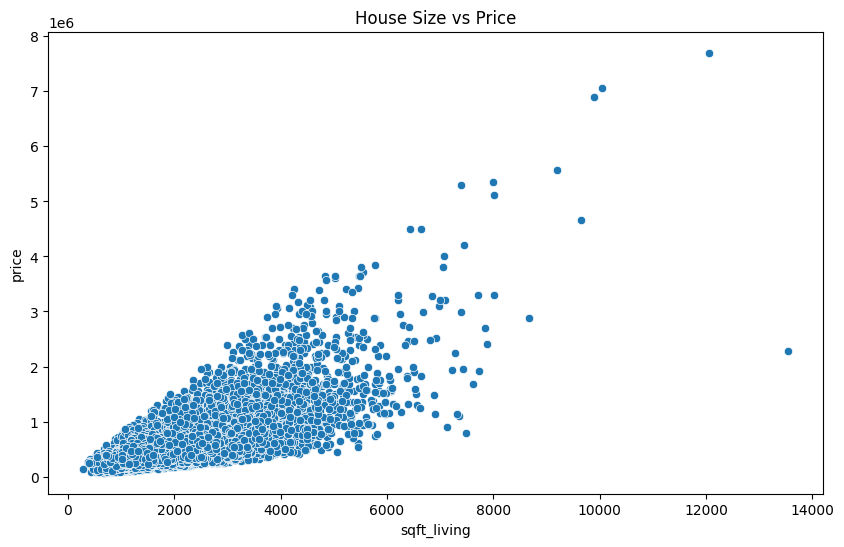

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = "sqft_living", y = "price", data = house_price)
plt.title("House Size vs Price")
plt.show()

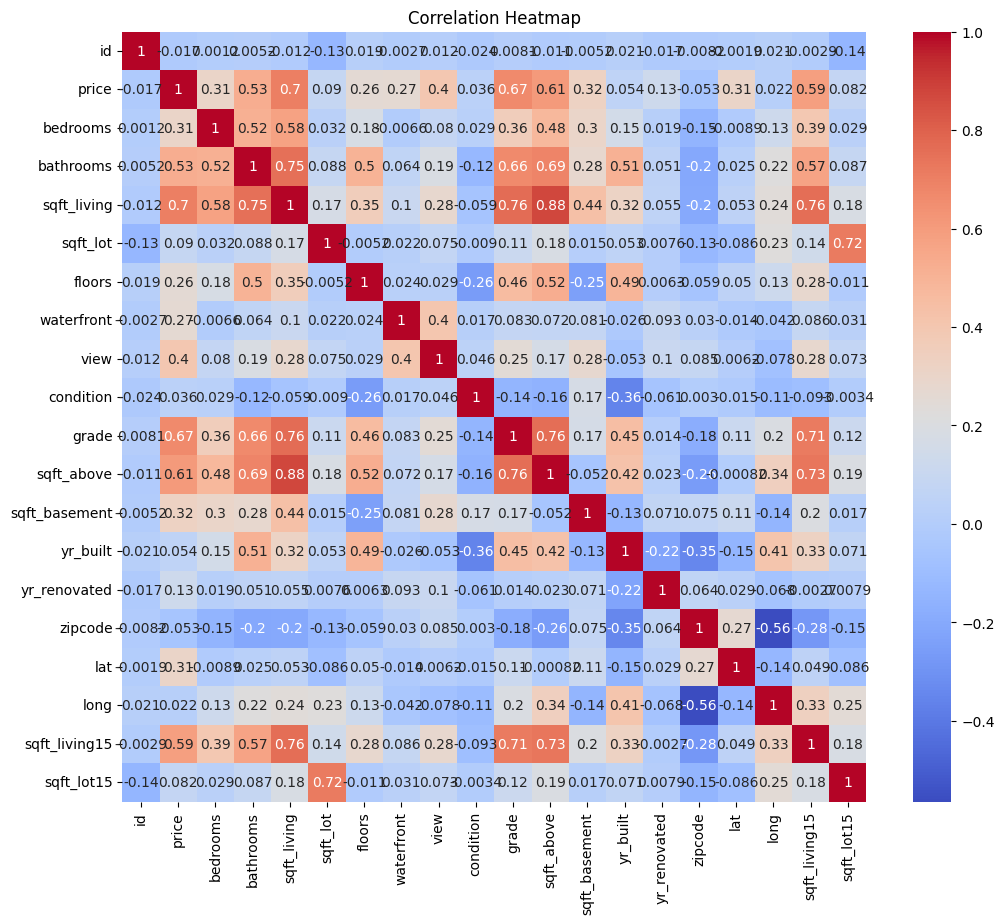

In [8]:
numeric_cols = house_price.select_dtypes(include = [np.number])
plt.figure(figsize = (12, 10))
sns.heatmap(numeric_cols.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()


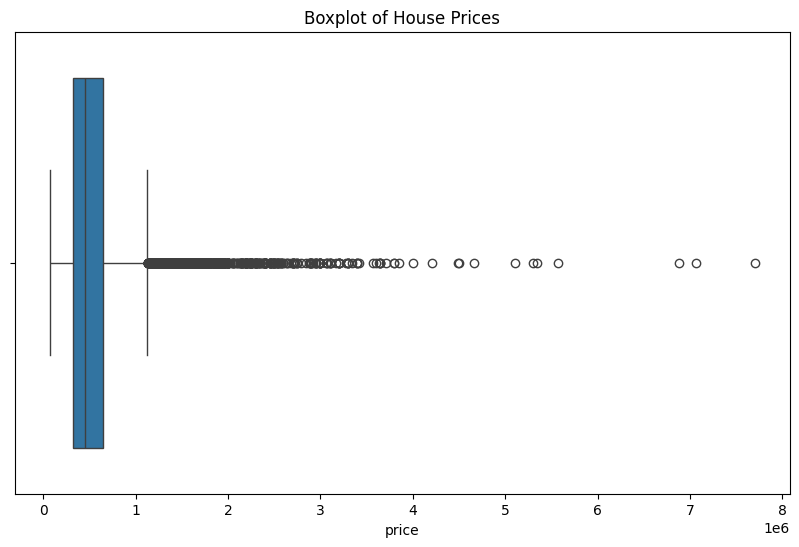

In [9]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = house_price["price"])
plt.title("Boxplot of House Prices")
plt.show()

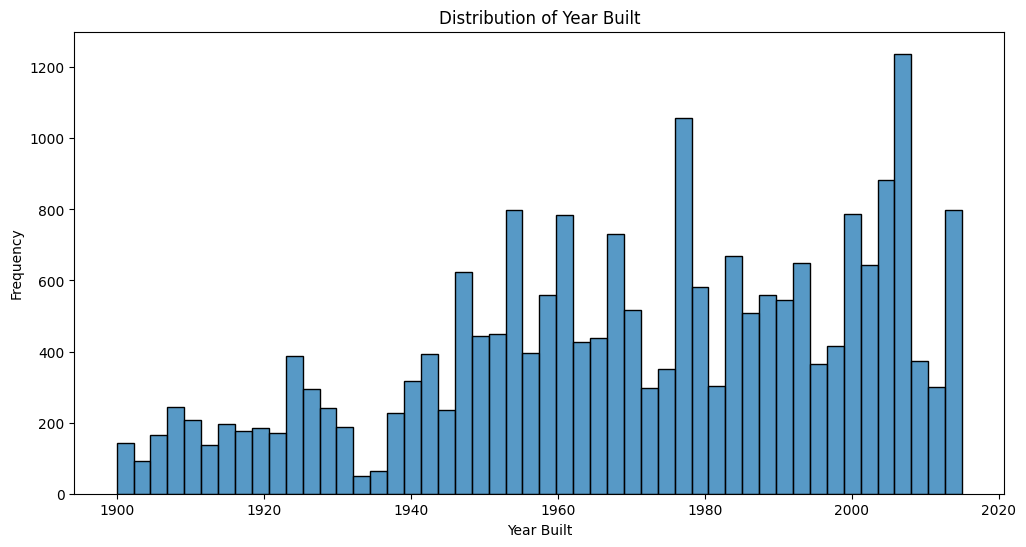

In [10]:
plt.figure(figsize = (12, 6))
sns.histplot(house_price["yr_built"], bins = 50, kde = False)
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.show()

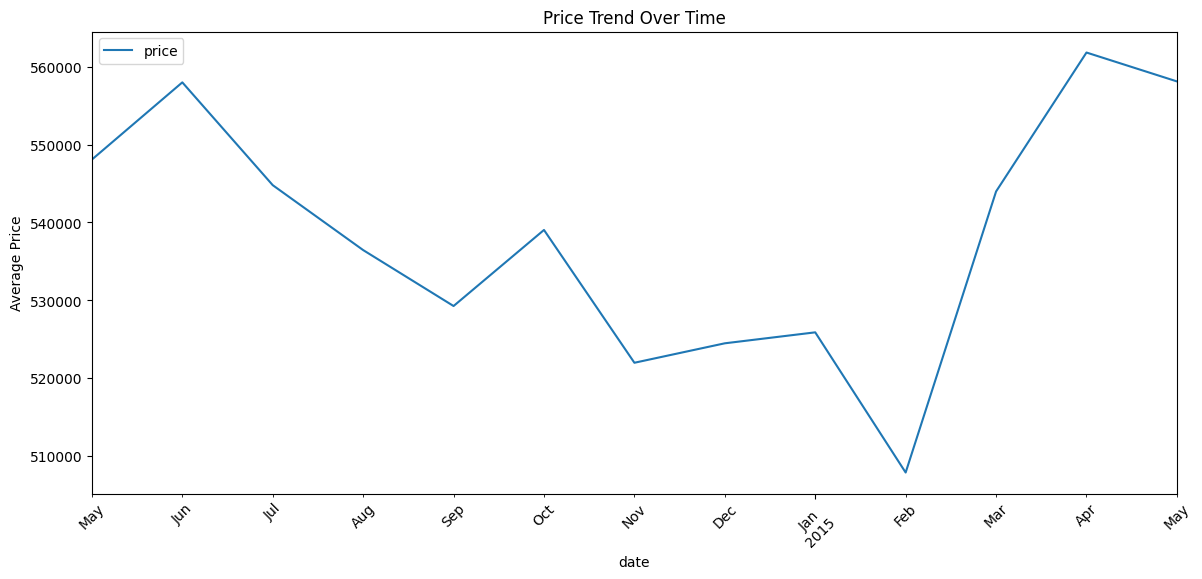

In [11]:
price_trend = house_price[["date", "price"]].copy()

price_trend.set_index("date", inplace = True)

price_trend = price_trend.resample("M").mean()

price_trend.plot(kind = "line", figsize = (14, 6), title = "Price Trend Over Time", ylabel = "Average Price", rot = 45)

plt.show()


In [12]:
selected_features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "grade", "sqft_above", "sqft_basement", "lat", "sqft_living15"]
house_features = house_price[selected_features]

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(house_features, house_price["price"], test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)

In [14]:
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Mean Squared Error (Validation): {mse_val}")
print(f"R-squared (Validation): {r2_val}")

Mean Squared Error (Validation): 45231308198.3661
R-squared (Validation): 0.6580655452877615


In [15]:
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")

Mean Squared Error (Test): 54518564114.736694
R-squared (Test): 0.6514395624141802


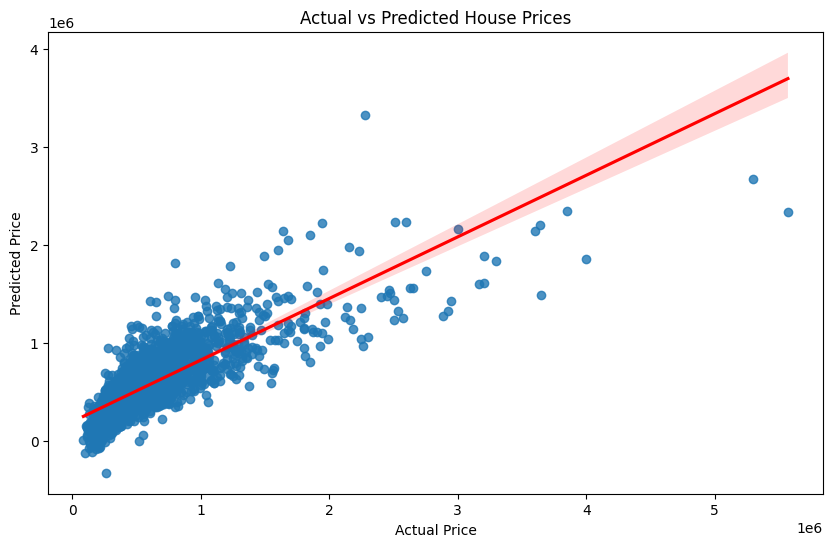

In [16]:
plt.figure(figsize = (10, 6))
sns.regplot(x = y_test, y = y_pred_test, line_kws = {"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

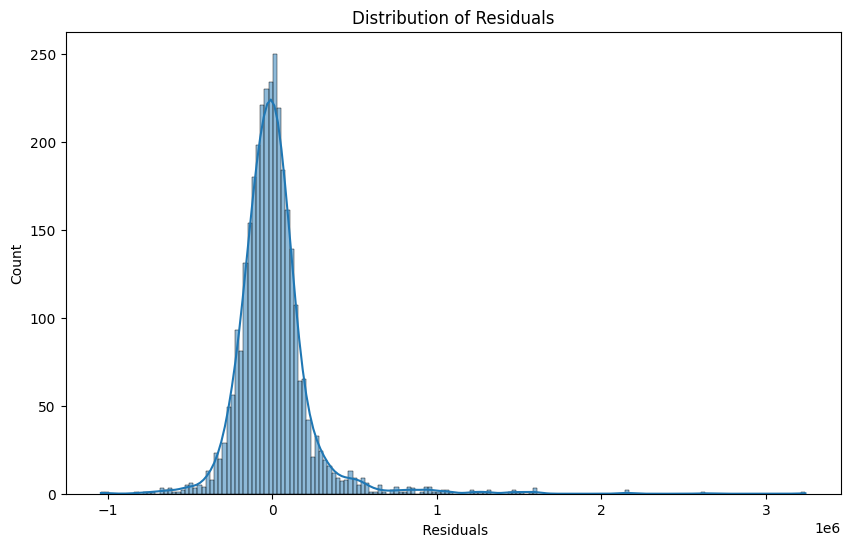

In [17]:
residuals = y_test - y_pred_test

plt.figure(figsize = (10, 6))
sns.histplot(residuals, kde = True)
plt.xlabel(" Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [18]:

# convert the date column to timestamp format for better processing
house_price["date"] = house_price["date"].apply(lambda x : x.timestamp())
# split the data into training, validation, and testing sets
features = house_price.drop("price", axis = 1)
target = house_price["price"]
# split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size = 0.3, random_state = 42)
# split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [19]:
# scale the features using StandardScaler
scaler = StandardScaler()
# fit the scaler on the training data and transform the training, validation, and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [20]:

# create a feedforward neural network model using MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes = (100, 50), activation = "relu", solver = "adam", max_iter = 3500, tol = 0.0001, random_state = 42)

# fit the model on the training data and validate it on the validation data
nn_model.fit(X_train_scaled, y_train)

# make predictions on the scaled validation data
y_pred_val = nn_model.predict(X_val_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [21]:

# create a feedforward neural network model using MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes = (100, 50), activation = "relu", solver = "adam", max_iter = 3500, tol = 0.0001, random_state = 42)

# fit the model on the training data and validate it on the validation data
nn_model.fit(X_train_scaled, y_train)

# make predictions on the scaled validation data
y_pred_val = nn_model.predict(X_val_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [22]:

# make predictions on the scaled testing data
y_pred_test = nn_model.predict(X_test_scaled)

# evaluate the model performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")


Mean Squared Error (Test): 455108498487.75085
R-squared (Test): -1.9097027766187336
